![Screenshot 2024-06-24 171107.png](<attachment:Screenshot 2024-06-24 171107.png>)
![Screenshot 2024-06-24 171129.png](<attachment:Screenshot 2024-06-24 171129.png>)
![Screenshot 2024-06-24 171250.png](<attachment:Screenshot 2024-06-24 171250.png>)

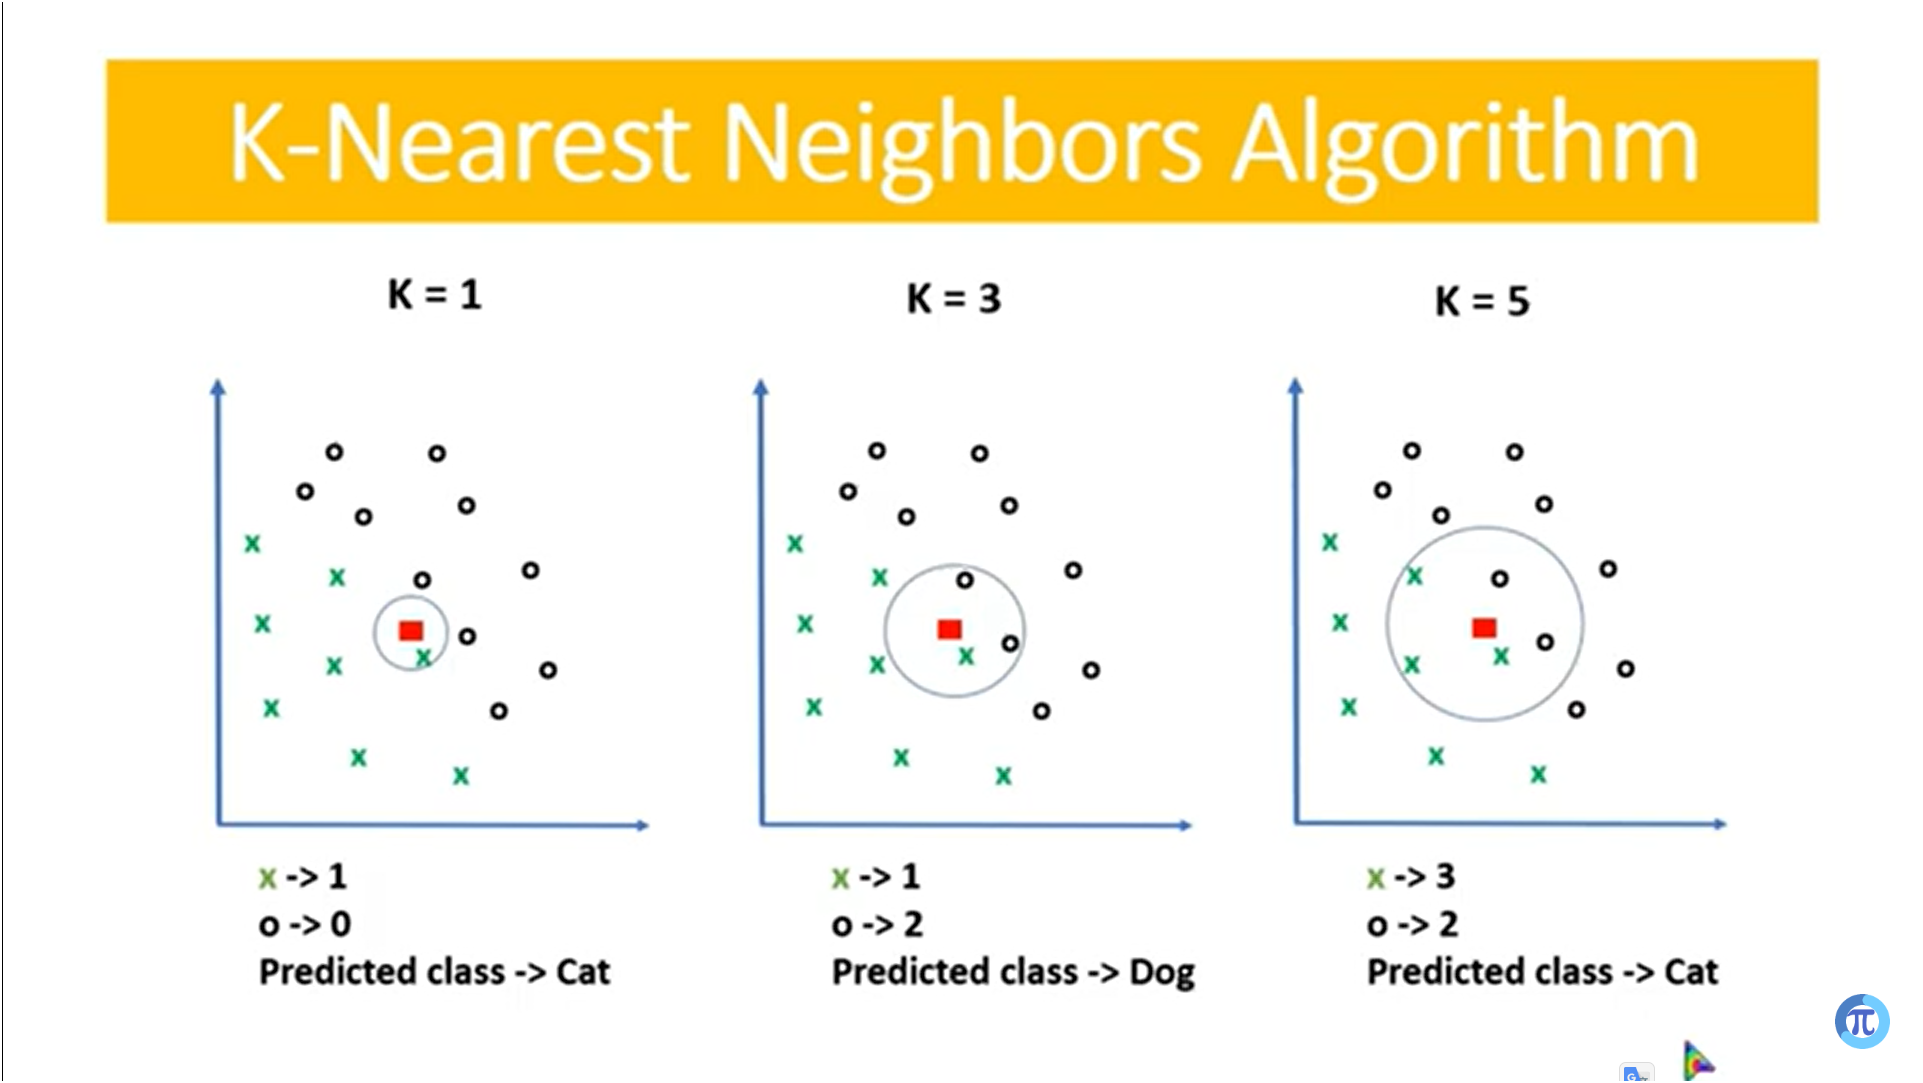
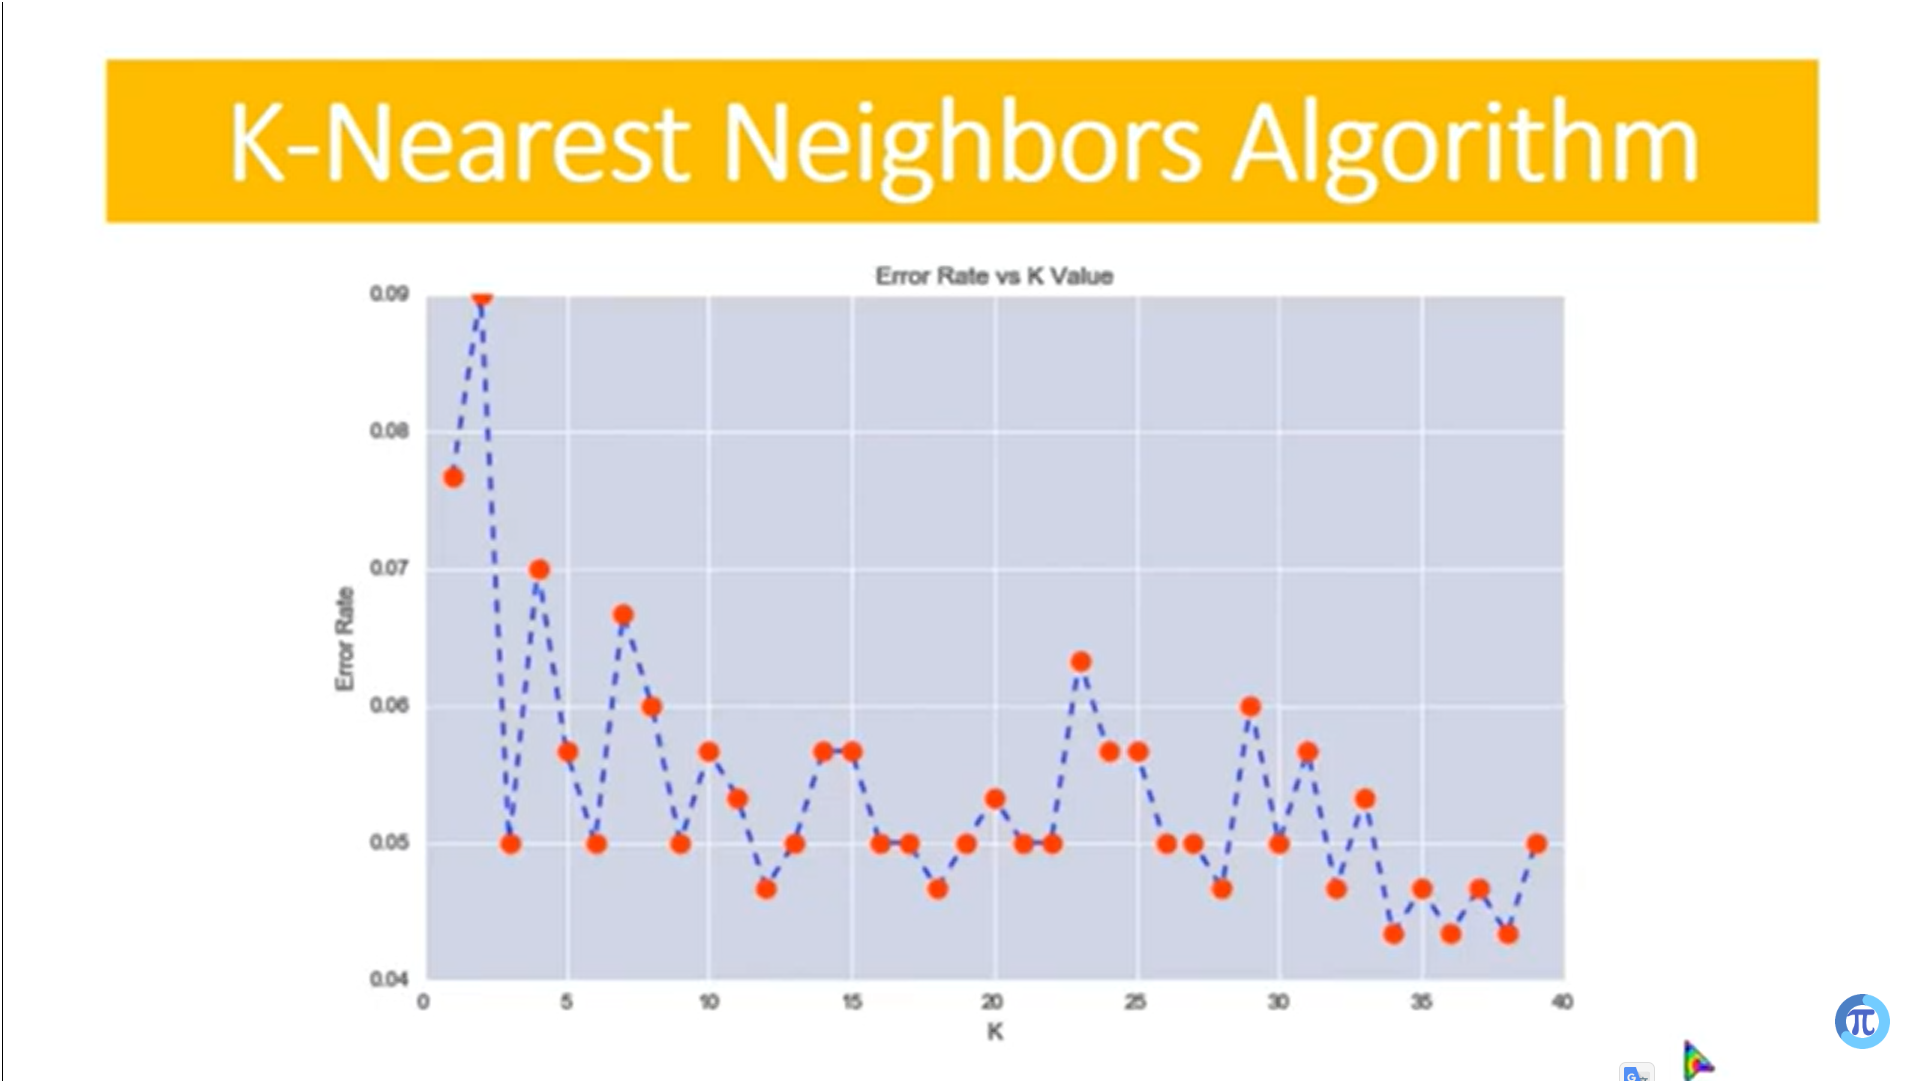
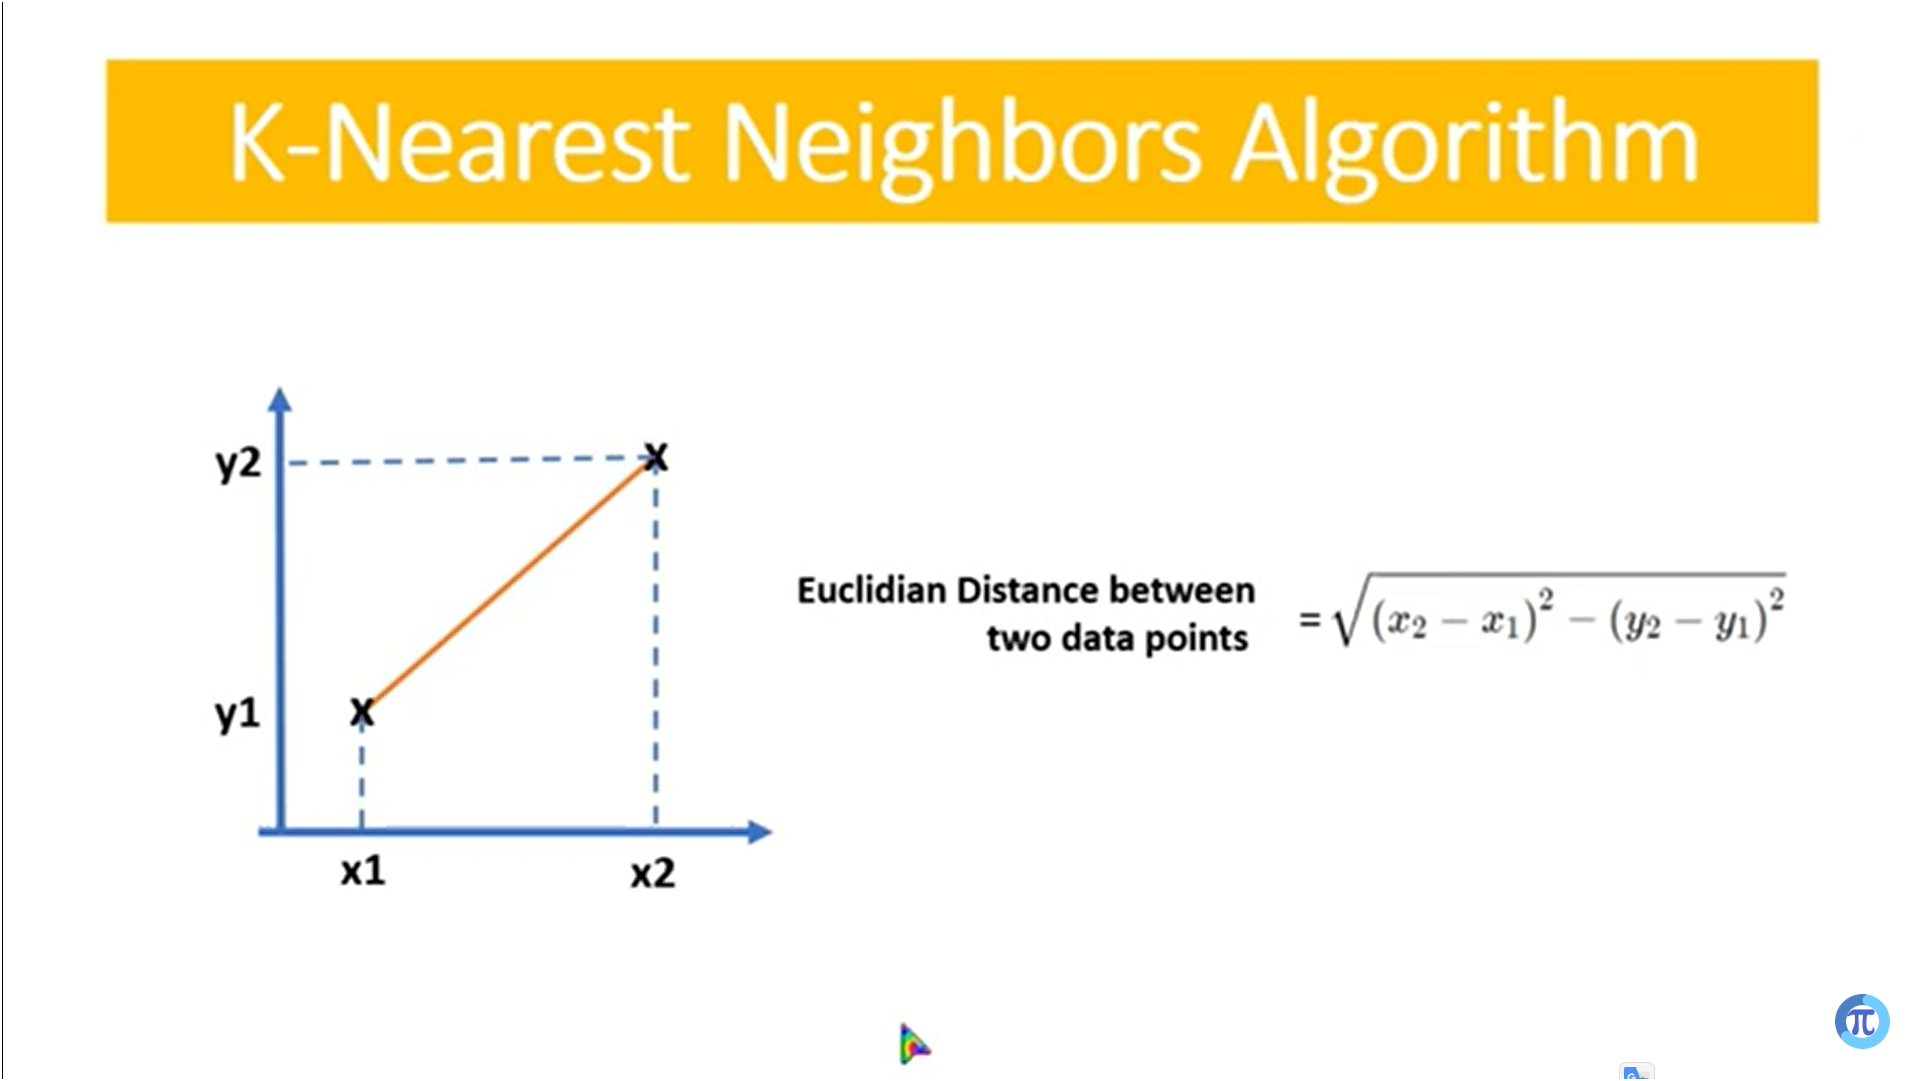

In [138]:
import numpy as np
import pandas as pd

import data set

In [139]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


check how many data have

In [140]:
data.shape

(150, 6)

In [141]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

check null data

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


get summary of data

In [143]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


take X values

In [144]:
x = data.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


take Y values

In [145]:
y = data.iloc[:,-1]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

featuring data

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(x))
x[0:5]

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Taking apart data to test and train

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [148]:
x_test.shape

(30, 4)

In [149]:
x_train.shape

(120, 4)

train data with KKN algorithm

In [150]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

check predicted value with test data

In [151]:
pred = model.predict(x_test)
pred[0:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [152]:
y_test[0:5]

116     Iris-virginica
126     Iris-virginica
87     Iris-versicolor
32         Iris-setosa
23         Iris-setosa
Name: Species, dtype: object

check accuracy of model

In [153]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.9666666666666667

In [154]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, pred))
cm

,0,1,2
0,13,0,0
1,0,7,0
2,0,1,9


In [155]:
result = pd.DataFrame( data=[y_test.values,pred], index = ['y_test', 'pred'])
result.transpose()

,y_test,pred
0,Iris-virginica,Iris-virginica
1,Iris-virginica,Iris-virginica
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor


Choose best K value

In [156]:
correct_sum =  []
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    correct  = np.sum(pred == y_test)
    correct_sum.append(correct)

In [157]:
correct_sum

[29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 28, 29, 29, 29, 29, 29]

In [158]:
result = pd.DataFrame(data=correct_sum)
result.index = result.index + 1
result.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,29,29,29,28,28,28,28,28,28,28,28,28,29,28,29,29,29,29,29


In [161]:
model = KNeighborsClassifier(n_neighbors=13)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [162]:
accuracy_score(y_test, pred)

0.9666666666666667